# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

hello world


# Question 1

In this question we are asked to find the optimal coverage amount of the agent.
We do this following this approach:
- define the utility function of the agent
- maximize the utility function with the given parametrization using loops
    - problem: q* depends on x, so use for loop within for loop

best with loop is           -1.11111111 at q = 0.50000000
want to insure 100% of loss as risk averse
best with loop for x = 0.10000000 is -1.02040816 at q = 0.10000000
best with loop for x = 0.20000000 is -1.04166667 at q = 0.20000000
best with loop for x = 0.30000000 is -1.06382979 at q = 0.30000000
best with loop for x = 0.40000000 is -1.08695652 at q = 0.40000000
best with loop for x = 0.50000000 is -1.11111111 at q = 0.50000000
best with loop for x = 0.60000000 is -1.13636364 at q = 0.60000000
best with loop for x = 0.70000000 is -1.16279070 at q = 0.70000000
best with loop for x = 0.80000000 is -1.19047619 at q = 0.80000000
best with loop for x = 0.90000000 is -1.21951220 at q = 0.90000000


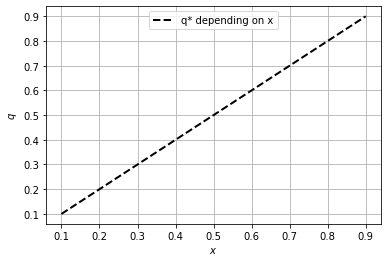

In [9]:
# solving the model, can at a later stage be moved to .py file
def u(z, v = -2):
    return z**(1+v)/(1+v)

def u_unins(x, y = 1, p = 0.2):
    return p*u(y-x) + (1-p)*u(y)
 
    
# try to do it with fixed x=0.5
def u_ins(q, x=0.5, y = 1, p = 0.2, v = -2):
    return p*u(y-x+q-p*q) + (1-p)*u(y-p*q)


# first try to optimize for given level of x = 0.5
x=0.5
# b. solution using a loop
N = 100
q_vec = np.linspace(0.1,x,N)
u_vec = np.empty(N)

u_best = -999 # initial maximum
q_best = np.nan # not-a-number


for i,q in enumerate(q_vec):
    u_now = u_vec[i] = u_ins(q)
    if u_now>u_best:
        q_best=q
        u_best=u_ins(q)
        
print(f'best with loop is           {u_best:.8f} at q = {q_best:.8f}')
print("want to insure 100% of loss as risk averse")


# now optimize for different levels of x
q_save = np.empty(9)
x = np.linspace(0.1,0.9,9)
N = 100
for ind, x_i in enumerate(x):
    q_vec = np.linspace(0.1,x_i,N)
    u_vec = np.empty(N)
    u_best = -999 # initial maximum
    q_best = np.nan # not-a-number
    for i,q in enumerate(q_vec):
        u_now = u_vec[i] = u_ins(q, x=x_i)
        if u_now>u_best:
            q_best=q
            u_best=u_ins(q, x=x_i)
    print(f'best with loop for x = {x_i:.8f} is {u_best:.8f} at q = {q_best:.8f}')
    q_save[ind]=q_best

    
    

# figure
import matplotlib.pyplot as plt
fig = plt.figure() # dpi = dots-per-inch (resolution)
ax = fig.add_subplot(1,1,1)

ax.plot(x,q_save,ls='--',lw=2,color='black',label='q* depending on x')

ax.set_xlabel('$x$')
ax.set_ylabel('$q$')
ax.grid(True)
ax.legend(loc='upper center');

# Question 2

Explain your code and procedure

In [3]:
# code

# Question 3

Explain your code and procedure

In [3]:
# code example to add

ADD CONCISE CONLUSION.